# Импорты

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')


# Лабораторная работа №3

In [ ]:
df_iris = pd.read_csv('data/Iris.csv')
df_iris.head(2)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


Датасет состоит из 150 наблюдений и включает 4 количественных признака и 1 категориальный признак:

Признаки:
* Sepal Length (длина чашелистика): Длина чашелистика в сантиметрах.
* Sepal Width (ширина чашелистика): Ширина чашелистика в сантиметрах.
* Petal Length (длина лепестка): Длина лепестка в сантиметрах.
* Petal Width (ширина лепестка): Ширина лепестка в сантиметрах.
* Species (вид): Категориальный признак, обозначающий вид ириса

### Корреляционная матрица

In [ ]:
df_iris.drop(columns=['Id', 'Species']).corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Стат. тест Пирсона

In [ ]:
correlation, p_value = scipy.stats.pearsonr(
    df_iris['PetalLengthCm'], df_iris['PetalWidthCm']
)
print(f"Коэффициент корреляции Пирсона: {correlation:.2f}")
print(f"p-значение: {p_value:.2f}")


Коэффициент корреляции Пирсона: 0.96
p-значение: 0.00


### Линия аппроксимации и гистограмма рассеяния

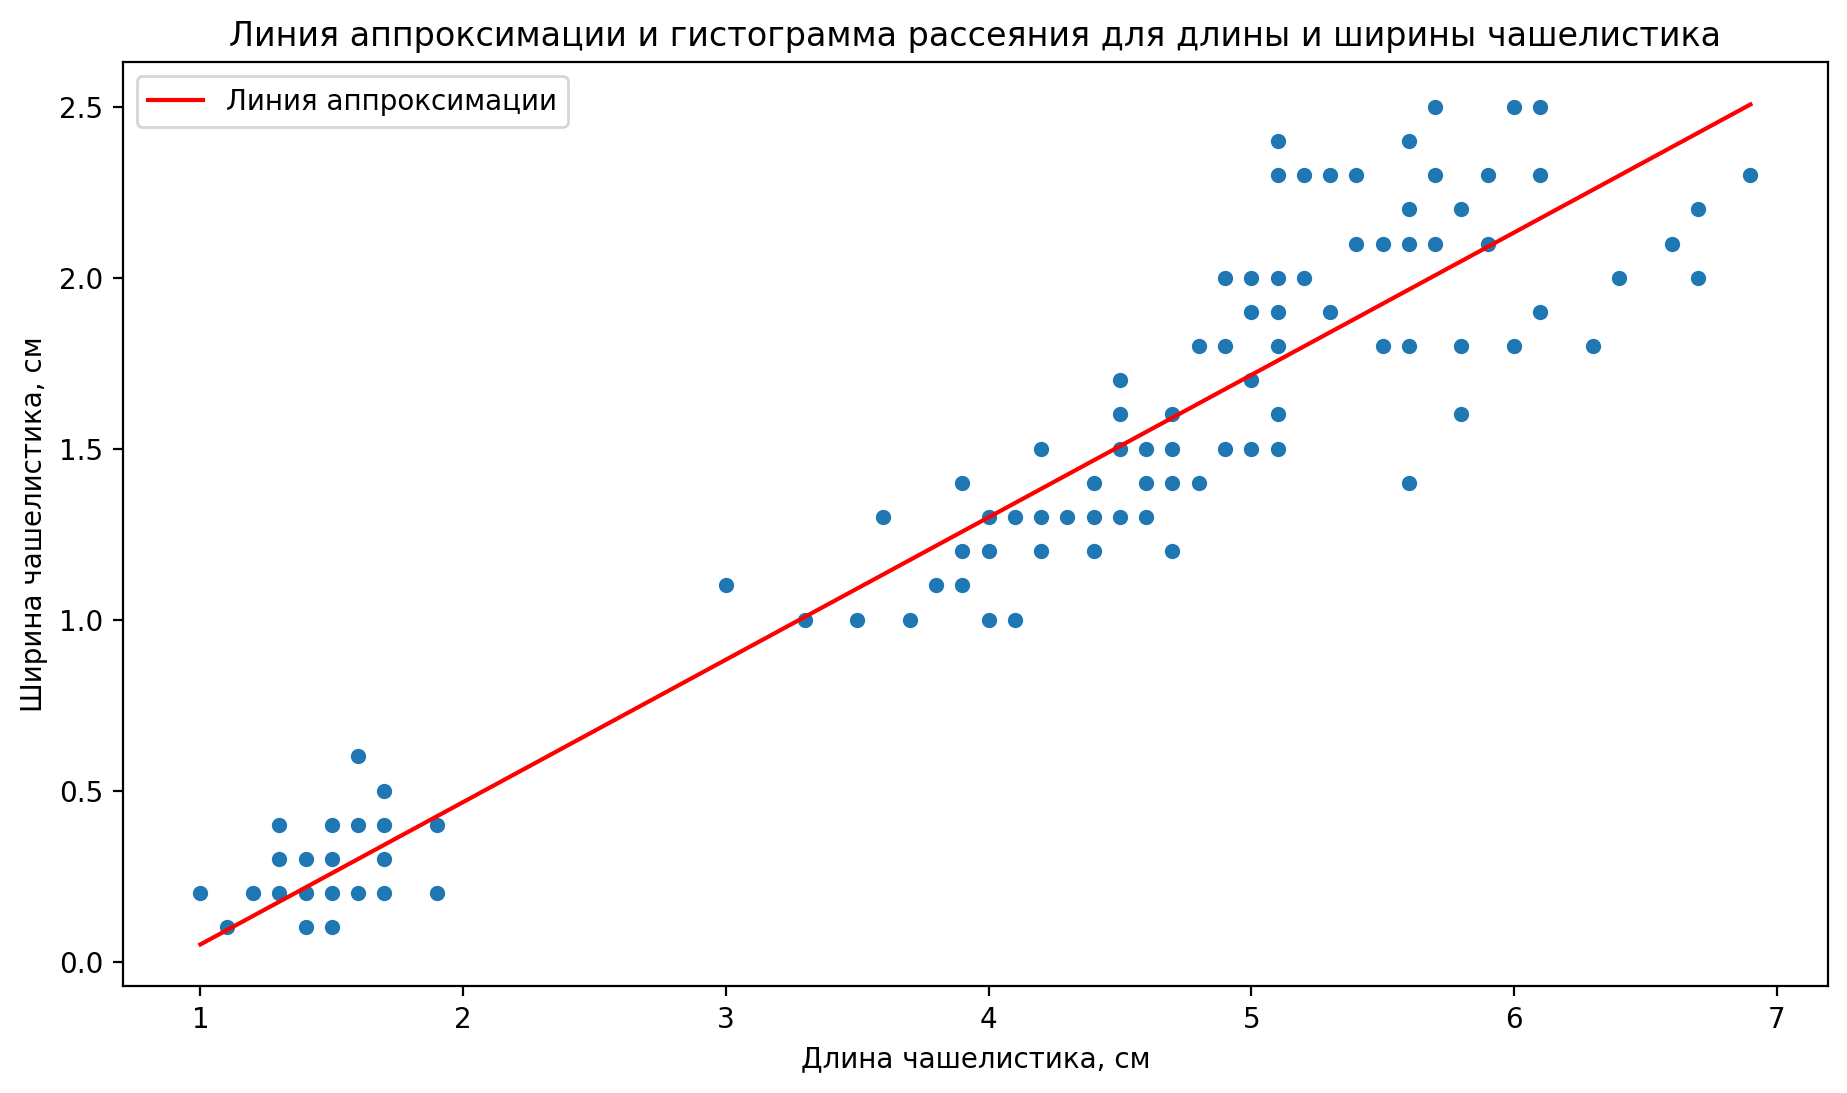

In [84]:
plt.figure(figsize=(11, 6), dpi=200)
plt.title('Линия аппроксимации и гистограмма рассеяния для длины и ширины чашелистика')
sns.scatterplot(df_iris, x='PetalLengthCm', y='PetalWidthCm')

X=df_iris['PetalLengthCm'].values.reshape(-1, 1)
y=df_iris['PetalWidthCm'].values

lin_reg = LinearRegression().fit(X, y)

lin_reg.coef_

x_graph=np.linspace(
    df_iris['PetalLengthCm'].min(),
    df_iris['PetalLengthCm'].max(),
    num=2
).reshape(-1, 1)
y_graph=lin_reg.predict(x_graph)

plt.plot(x_graph, y_graph, color='red', label='Линия аппроксимации')
plt.xlabel('Длина чашелистика, см')
plt.ylabel('Ширина чашелистика, см')

plt.legend()


### Значение R²

In [ ]:
r_score = lin_reg.score(X, y)
print(f"R²={r_score:.2f}")


R²=0.93


### Разбиение на выборки

In [ ]:
random_sample = df_iris.sample(frac=1/3, random_state=25)

stratified_sample = (
    df_iris.groupby('Species')
    .apply(lambda x: x.sample(frac=1/3)).reset_index(drop=True)
)


In [48]:
map_names = {
    "SepalLengthCm": "длина чашелистика",
    "SepalWidthCm": "ширина чашелистика",
    "PetalLengthCm": "длина лепестка",
    "PetalWidthCm": "ширина лепестка",
}


### Среднее значение выборок

In [58]:
print("\nСредние для генеральной выборки")
display(
    df_iris.drop(columns=['Id', 'Species'])
    .rename(columns=map_names)
    .mean().reset_index()
    .rename(columns={'index': 'Название', 0: 'Значение'})
)

print("\nСредние для случайной выборки")
display(
    random_sample.drop(columns=['Id', 'Species'])
    .rename(columns=map_names)
    .mean().reset_index()
    .rename(columns={'index': 'Название', 0: 'Значение'})
)

print("\nСредние для стратифицированной выборки")
display(
    stratified_sample.drop(columns=['Id', 'Species'])
    .rename(columns=map_names)
    .mean().reset_index()
    .rename(columns={'index': 'Название', 0: 'Значение'})
)



Средние для генеральной выборки


,Название,Значение
0,длина чашелистика,5.843333
1,ширина чашелистика,3.054000
2,длина лепестка,3.758667
3,ширина лепестка,1.198667



Средние для случайной выборки


,Название,Значение
0,длина чашелистика,5.772
1,ширина чашелистика,3.082
2,длина лепестка,3.472
3,ширина лепестка,1.092



Средние для стратифицированной выборки


,Название,Значение
0,длина чашелистика,5.958824
1,ширина чашелистика,3.119608
2,длина лепестка,3.823529
3,ширина лепестка,1.239216


### Доверительные интервалы

In [ ]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Используем ddof=1 для выборочной оценки
    n = len(data)
    h = std_dev * scipy.stats.t.ppf((1 + confidence) / 2., n - 1) / np.sqrt(n)
    return mean - h, mean + h


In [87]:
for df, type in [
    (df_iris, 'генеральной'),
    (random_sample, 'случайной'),
    (stratified_sample, 'стратифицированной')
]:
    print(f"\nДоверительный интервал для {type} выборки")
    for column in [
        'SepalLengthCm', 'SepalWidthCm',
        'PetalLengthCm', 'PetalWidthCm'
    ]:
        min_value, max_value = confidence_interval(df[column])
        general_mean = df_iris[column].mean()
        conclusion = (
            'среднее находится внутри диапозона' 
            if min_value < general_mean and general_mean < max_value
            else 'среднее находится вне диапозона' 
        )
        print(f"{map_names[column]:<20} [см]: {min_value:>10.2f} {max_value:>10.2f} => {conclusion}")



Доверительный интервал для генеральной выборки
длина чашелистика    [см]:       5.71       5.98 => среднее находится внутри диапозона
ширина чашелистика   [см]:       2.98       3.12 => среднее находится внутри диапозона
длина лепестка       [см]:       3.47       4.04 => среднее находится внутри диапозона
ширина лепестка      [см]:       1.08       1.32 => среднее находится внутри диапозона

Доверительный интервал для случайной выборки
длина чашелистика    [см]:       5.53       6.01 => среднее находится внутри диапозона
ширина чашелистика   [см]:       2.96       3.21 => среднее находится внутри диапозона
длина лепестка       [см]:       2.96       3.98 => среднее находится внутри диапозона
ширина лепестка      [см]:       0.88       1.31 => среднее находится внутри диапозона

Доверительный интервал для стратифицированной выборки
длина чашелистика    [см]:       5.71       6.21 => среднее находится внутри диапозона
ширина чашелистика   [см]:       3.00       3.24 => среднее находитс